# Narrative Flow of Men and Women



 ### Hypothesis:

Men and women discuss sociability and solidarity in different ways, i.e. in different contexts. (..) Solidarity and social relations were different in the men and women section of Birkenau; men and women recall them in different ways and contexts. In practice, this means that they are primed and followed by different topics in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women
- the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women?
- How are these topics related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- What are those topics that prime topics of solidarity and social bonds?
- Where did solidarity take place? In what contexts did solidarity take place?
- What topics do topics related to solidarity and social bonds prime for men and women?


In [217]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *

## Load the relevant data

In [218]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_complete  = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ constants.output_data_segment_keyword_matrix
features_df = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)


### Load  the topic map

In [239]:
topic_map_directory = parent +'/'+constants.input_data+'feature_maps/'
topic_map = pd.read_csv(topic_map_directory+'feature_map_no_friends_no_food_sharing.csv')
topic_map_living_conditions = topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list()

topic_map_living_condition = []
for element in topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list():
    if 'camp' in element:
        topic_map_living_condition.append(' '.join(element.split(' ')[1:]))
    else:
        topic_map_living_condition.append(element)
topic_map_living_condition

['barracks',
 'barracks (stills)',
 'environmental conditions',
 'housing conditions',
 'latrines',
 'living conditions',
 'sanitary conditions',
 'showers',
 'deportation sanitary conditions',
 'environmental conditions',
 'housing conditions',
 'infestations',
 'lice',
 'living conditions',
 'sanitary conditions',
 'transfer environmental conditions',
 'transfer sanitary conditions']

In [244]:
topic_map_living_condition_forced_labour = topic_map[topic_map['CoverTerm']=="forced labor"].KeywordLabel.to_list()

## Observation 1

### Qualitative description

Both men and women discuss aid giving in the context of camp living conditions and forced labour, women are more likely to discuss it in the context of camp living conditions. While men are more likely to discuss it in the context of forced labour. For instance, the following pathway is present in both men and women testimonies but in testimonies of women (3.3%), more traffic is going through it than in testimonies of men(2%):

arrival-selections-intake procedures-living conditions-aid giving

In [100]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()
flux = 1

In [ ]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [ ]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Calculate the context of living conditions for women

In [104]:
result = []

for path in flux_w:
    if len(path.split('-living conditions-aid giving'))>1 or len(path.split('-housing conditions-aid giving'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-aid giving
3.3261557044393664


arrival-loved ones' separations-intake procedures-housing conditions-aid giving
1.2580761275344385


4.5842318319738045


Calculate the context of living conditions for men

In [105]:
result = []

for path in flux_m:
    if len(path.split('-living conditions-aid giving'))>1 or len(path.split('-housing conditions-aid giving'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-aid giving
2.0488989687848225


arrival-intake procedures-housing conditions-aid giving
1.6903370505760626


3.7392360193608853


Calculate the context of forced labor for women

In [106]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-aid giving'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-intake procedures-living conditions-forced labor-aid giving
5.366424007453563


arrival-loved ones' separations-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
1.4556141516854084


6.822038159138971


Calculate the context of forced labo for men

In [107]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-aid giving'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
4.673073571268745


arrival-selections-intake procedures-forced labor-aid giving
3.9390573005910623


8.612130871859808


Calculate the context of social relation for women

In [108]:
result = []

for path in flux_w:
    if len(path.split('-social relations-aid giving'))>1 or len(path.split('-friends-aid giving'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-selections-intake procedures-housing conditions-social relations-aid giving
1.2096268699827568


arrival-loved ones' separations-intake procedures-social relations-aid giving
1.1360926530357383


arrival-intake procedures-living conditions-friends-aid giving
0.43317315181512156


arrival-forced labor-food-selections-intake procedures-living conditions-social relations-aid giving
0.06396386339760252


arrival-shoes-housing conditions-food-social relations-aid giving
0.00339471191183699


arrival-Polish kapos-selections-intake procedures-living conditions-social relations-aid giving
0.0007065333569470718


arrival-corpse cremations-departure-transfer to camps-freight trains-intake procedures-living conditions-social relations-aid giving
0.00033687554689544857


2.8472946590468986


In [110]:
result = []

for path in flux_m:
    if len(path.split('-social relations-aid giving'))>1 or len(path.split('-friends-aid giving'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

arrival-loved ones' separations-intake procedures-social relations-aid giving
1.1350377669345642


arrival-loved ones' separations-intake procedures-housing conditions-Appell-social relations-aid giving
0.9013482106234745


arrival-loved ones' separations-intake procedures-housing conditions-social relations-aid giving
0.8331164317136336


arrival-brutal treatment-selections-intake procedures-food-punishments-beatings-social relations-aid giving
0.46533907560701315


arrival-transfer corpses-Holocaust-related psychological reactions-post-conflict medical problems-friends-aid giving
0.06658924909711206


3.401430733975798


### Visualization

10 labels to show
9 labels to show


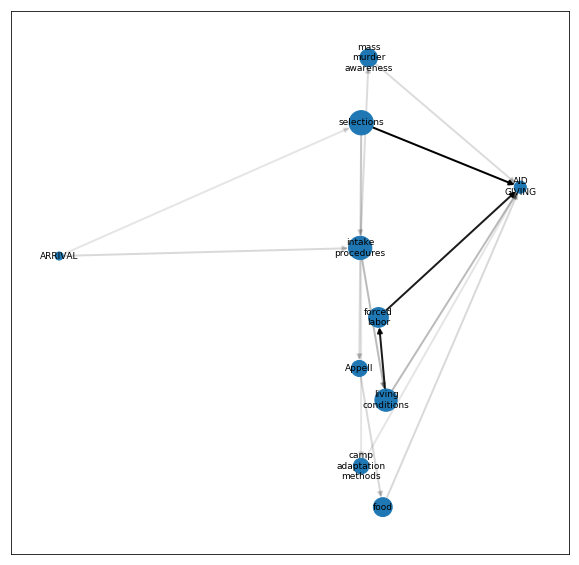

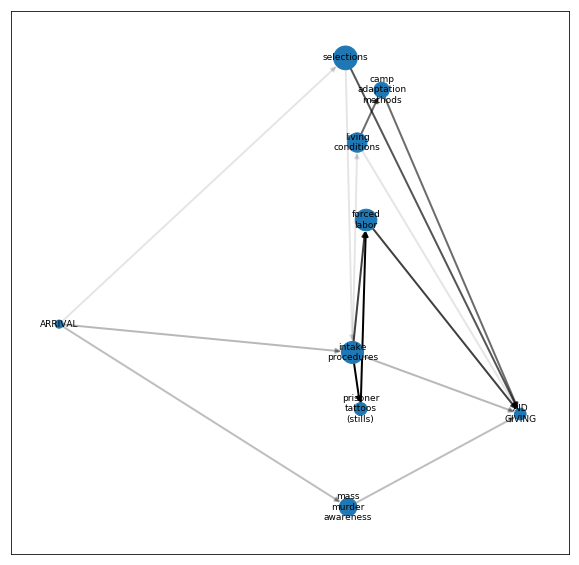

In [123]:
flux = 0.21
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [124]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [125]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

Path flux		%path	%of total	path
living conditions-forced labor-aid giving
6.644852704834618
living conditions-selections-aid giving
5.494808205247127
living conditions-aid giving
4.417279021596912
living conditions-food-aid giving
3.0176115426843433
living conditions-camp adaptation methods-aid giving
2.9336925881011084
living conditions-mass murder awareness-aid giving
2.920880229051546
living conditions-Appell-aid giving
2.0333141829806163
living conditions-selections-intake procedures-aid giving
1.9239348755373278
living conditions-family interactions-aid giving
1.7830534367901554


In [126]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

Path flux		%path	%of total	path
living conditions-forced labor-aid giving
6.564598702399662
living conditions-camp adaptation methods-aid giving
4.4181837256414696
living conditions-selections-aid giving
3.471622581939516
living conditions-aid giving
2.8647828113142224
living conditions-mass murder awareness-aid giving
2.4899964842110562
living conditions-selections-intake procedures-aid giving
2.382461559287751
living conditions-food-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
2.0875351210036954
living conditions-housing conditions-aid giving
1.6076542634355284
living conditions-social relations-aid giving
1.572449463695696
living conditions-brutal treatment-aid giving
1.5272301041002188
living conditions-Appell-aid giving
1.4497261529085559


6 labels to show
7 labels to show


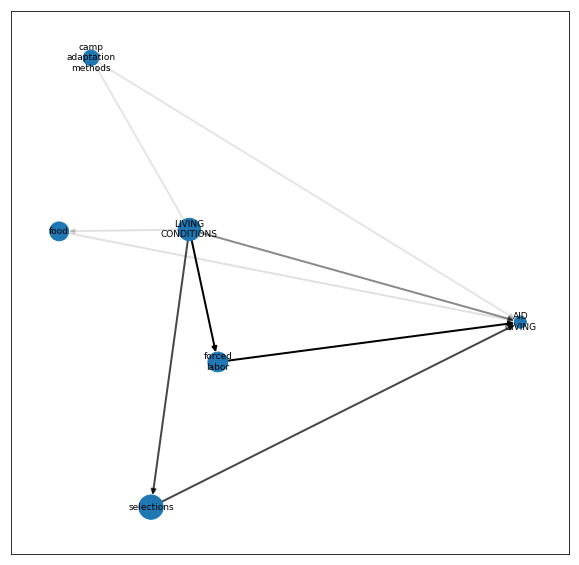

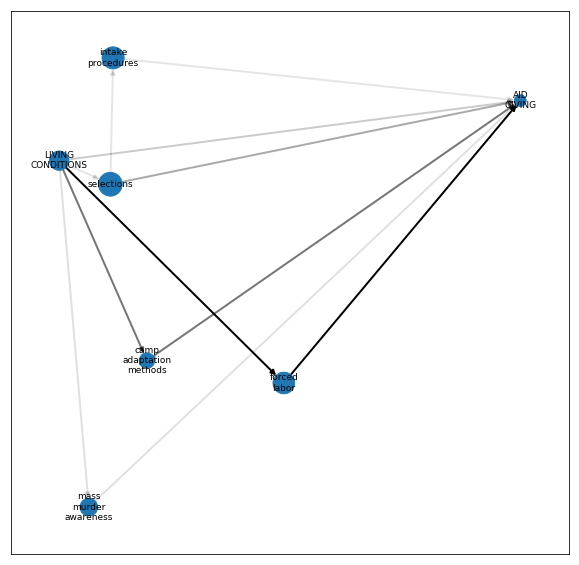

In [141]:
flux=0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. By contrast, women are more likely to discuss housing and living conditions.



In [152]:
story_start = 'aid giving'
story_end = 'departure'
flux = 1

In [153]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-departure
6.904558607860367
aid giving-departure
4.081247440211766
aid giving-selections-intake procedures-living conditions-departure
3.752409996500409
aid giving-camp adaptation methods-departure
3.462167952628293
aid giving-forced labor-departure
2.7296158781494175
aid giving-living conditions-selections-transfer to camps-departure
2.5186672379147423
aid giving-intake procedures-mass murder awareness-departure
2.1848288794035238
aid giving-loved ones' separations-intake procedures-housing conditions-Appell-food-selections-transfer procedures-departure
2.0039297515735286
aid giving-Mengele, Josef-intake procedures-housing conditions-food-departure
1.8784282240324974
aid giving-Appell-selections-intake procedures-living conditions-transfer procedures-departure
1.709727479832788
aid giving-loved ones' fates-departure
1.4925144241409383
aid giving-family interactions-departure
1.4011244106165845
aid giving-social relations-departure


In [154]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-departure
4.713057511302711
aid giving-intake procedures-living conditions-departure
4.490386115037704
aid giving-camp adaptation methods-departure
3.4836708813776402
aid giving-selections-intake procedures-food-departure
2.7558521209083144
aid giving-mass murder awareness-departure
2.472458988710841
aid giving-forced labor-departure
2.4194474651698146
aid giving-departure
2.418558315316323
aid giving-food-selections-intake procedures-housing conditions-Appell-departure
2.15539177370766
aid giving-loved ones' fates-departure
1.81166129567537
aid giving-living conditions-camp adaptation methods-departure
1.6736271018173603
aid giving-selections-transfer to camps-departure
1.4848465807032643
aid giving-forced labor-politico-military event awareness-departure
1.3753853668599325
aid giving-forced labor-food acquisition-departure
1.3548259776625797
aid giving-Mengele, Josef-intake procedures-prisoner tattoos (stills)-mass murder awarenes

Calculate for women

In [155]:
result = []

for path in flux_w:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

aid giving-forced labor-departure
2.7296158781494175


aid giving-forced labor-food-selections-intake procedures-clothing-departure
0.8289941816137725


aid giving-forced labor-Mengele, Josef-intake procedures-housing conditions-social relations-departure
0.5123192060883646


aid giving-forced labor-food-sanitary conditions-physical hygiene maintenance-Allied military operations-departure
0.07939032173836172


4.150319587589916


Calculate for men

In [156]:
result = []

for path in flux_m:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

aid giving-forced labor-departure
2.4194474651698146


aid giving-forced labor-politico-military event awareness-departure
1.3753853668599325


aid giving-forced labor-food acquisition-departure
1.3548259776625797


aid giving-forced labor-brutal treatment-departure
0.8978199621392627


aid giving-forced labor-food-departure
0.7325144039431423


aid giving-forced labor-Polish prisoners-food-arrival-selections-intake procedures-prisoner tattoos-prisoner tattoos (stills)-Greek prisoners-departure
0.17555899775649847


6.955552173531229


In [157]:
result = []

for path in flux_w:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

aid giving-living conditions-selections-transfer to camps-departure
2.5186672379147423


aid giving-living conditions-departure
0.9061933059574195


aid giving-housing conditions-departure
0.8587674293844215


aid giving-living conditions-forced labor-bombardments-departure
0.2997903332730708


aid giving-housing conditions-Appell-forced labor-food acquisition-hiding and evasion-departure
0.1911433227958466


aid giving-living conditions-loved ones' renewed contacts-loved ones' fates-prisoner tattoos-showers-clothing-shoes-Mengele, Josef-arrival-selections-transfer to camps-forced march conditions-forced march guards-departure
0.006853354589021588


aid giving-living conditions-Appell-SS/SD personnel-intake procedures-gas chambers-doctors-departure
0.0023650301763213028


4.783780014090843


Calculate for men

In [158]:
result = []

for path in flux_m:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')
print (np.array(result).sum())

aid giving-living conditions-camp adaptation methods-departure
1.6736271018173603


aid giving-living conditions-Appell-selections-intake procedures-prisoner tattoos (stills)-departure
1.0886399886292717


aid giving-housing conditions-living conditions-transfer to camps-transfer conditions-perpetrator liberator-approach responses-departure
0.7409143120709991


aid giving-housing conditions-food-Soviet prisoners-departure
0.2652825562797489


aid giving-living conditions-food-latrines-departure
0.06391810038896809


aid giving-living conditions-food-gas chambers-psychological reactions-Roma prisoners-prisoner tattoos-criminal prisoners-survival explanations-attitudes-Holocaust testimony sharing reluctance-Holocaust testimony sharing willingness-post-World War II reflections-transfer to camps-transfer deaths-transfer killings-Ukrainian prisoners-departure
0.004501601303121525


aid giving-housing conditions-camp procedures-forced labor-prisoner identification numbers-prisoner tattoos (s

### Visualization

9 labels to show
12 labels to show


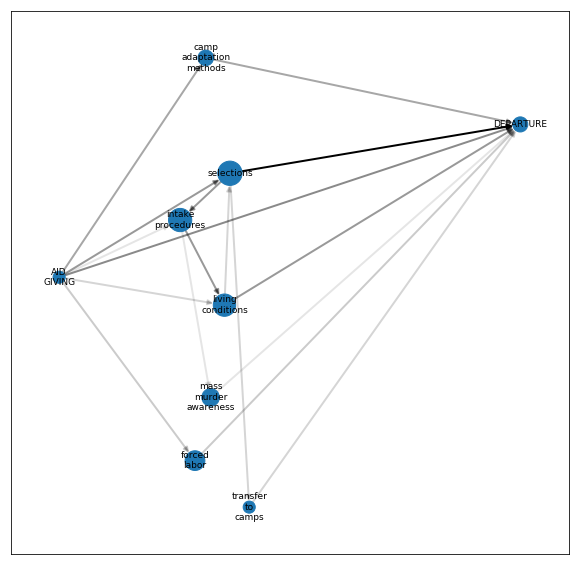

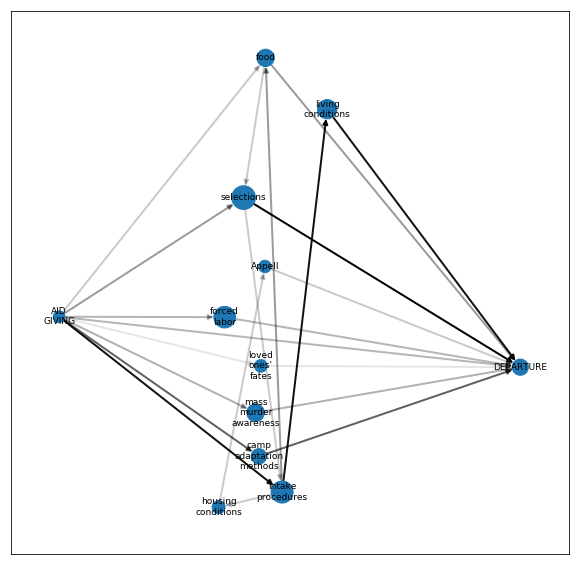

In [149]:
flux = 0.25
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 3

### Qualitative description

Similarly to aid giving, women are more likely to discuss food sharing in the context of living conditions, whereas men discuss it in the context of forced labour. 

### Visualization

In [159]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 1

In [160]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-housing conditions-Appell-food-food sharing
10.513088206537514
arrival-intake procedures-living conditions-forced labor-food sharing
8.917023181420248
arrival-selections-camp adaptation methods-food sharing
5.227533702378559
arrival-intake procedures-living conditions-food sharing
4.756063911165277
arrival-loved ones' separations-intake procedures-living conditions-selections-food sharing
3.1125640575679454
arrival-loved ones' separations-intake procedures-housing conditions-food-selections-departure-transfer to camps-food sharing
2.9381887133309825
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-food sharing
2.7267929954641894
arrival-intake procedures-family interactions-food sharing
2.6334146055279617
arrival-loved ones' separations-intake procedures-food sharing
2.0107133800724477
arrival-extended family members-food sharing
1.9446766681301904
arrival-selections-intake proced

In [161]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-food sharing
9.63912877743524
arrival-selections-intake procedures-food-food sharing
6.685433496756592
arrival-intake procedures-forced labor-food acquisition-food sharing
5.911395597919235
arrival-selections-departure-transfer to camps-food sharing
4.991517245921279
arrival-intake procedures-living conditions-camp adaptation methods-food sharing
3.460509755050664
arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-food sharing
3.209596127534682
arrival-selections-loved ones' fates-food sharing
3.1777600532410823
arrival-intake procedures-living conditions-departure-food sharing
2.8771099255418444
arrival-loved ones' separations-intake procedures-housing conditions-Appell-family interactions-food sharing
2.773448867109162
arrival-selections-intake procedures-living conditions-food-camp adaptation methods-aid giving-food sharing
2.588046768968176
arriva

Calculate the context of living conditions for women

In [162]:
result = []

for path in flux_w:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-intake procedures-living conditions-food sharing
4.756063911165277


arrival-loved ones' separations-intake procedures-housing conditions-food sharing
1.7558327389821418


6.511896650147419


Calculate the context of living conditions for men

In [163]:
result = []

for path in flux_m:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-housing conditions-food sharing
2.580383533099845


arrival-Mengele, Josef-intake procedures-living conditions-food sharing
2.00967295207804


4.590056485177885


Calculate the context of forced labor for women

In [164]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-intake procedures-living conditions-forced labor-food sharing
8.917023181420248


8.917023181420248


Calculate the context of forced labo for men

In [165]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-food sharing
9.63912877743524


arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-food sharing
3.209596127534682


12.84872490496992


10 labels to show
12 labels to show


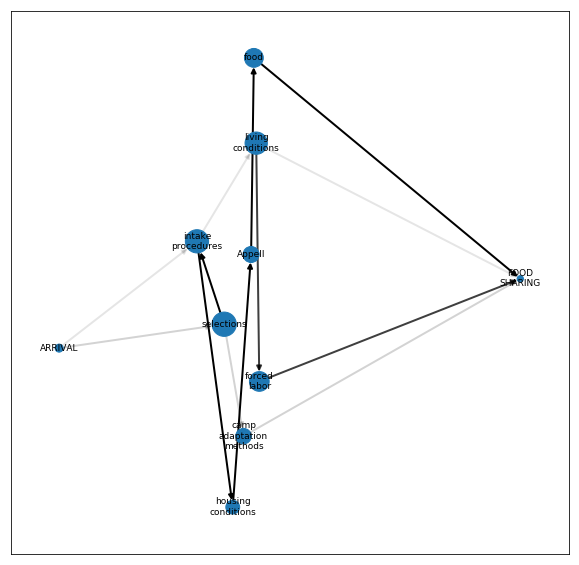

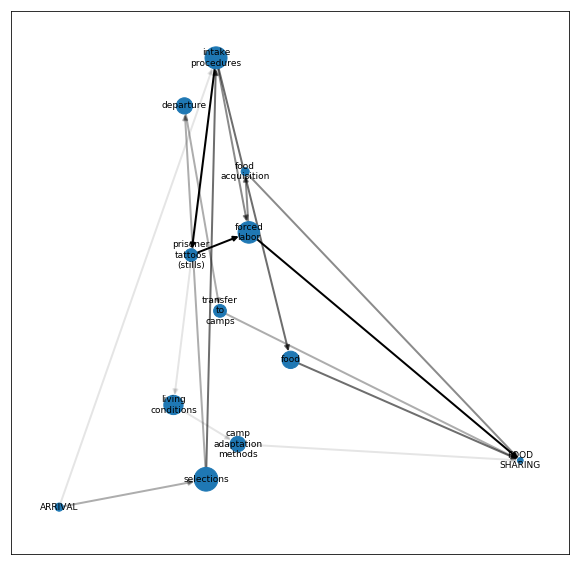

In [175]:
flux = 0.28
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 4

### Qualitative description

In testimonies of men and women, both housing conditions and forced labour are discussed following food sharing.

### Visualization

In [176]:
story_start = 'food sharing'
story_end = 'departure'
flux = 1

In [177]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-departure
6.867158139544298
food sharing-living conditions-departure
4.261560027826917
food sharing-camp adaptation methods-departure
3.698801213123281
food sharing-forced labor-departure
2.76665963846987
food sharing-Appell-food-selections-transfer to camps-departure
2.549069639605095
food sharing-loved ones' fates-intake procedures-living conditions-selections-transfer procedures-departure
2.4728870797092943
food sharing-departure
2.3110480855107385
food sharing-mass murder awareness-departure
2.191094877990339
food sharing-aid giving-selections-intake procedures-living conditions-transfer procedures-departure
2.091872893695317
food sharing-forced labor-food-departure
1.7959111395688039
food sharing-loved ones' fates-departure
1.774480307844524
food sharing-housing conditions-Appell-selections-intake procedures-living conditions-forced labor-aid giving-departure
1.506056984301137
food sharing-family interactions-departure
1.3983

In [178]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-departure
4.626145950484521
food sharing-living conditions-departure
4.567739561953951
food sharing-mass murder awareness-departure
4.214943159452747
food sharing-food-departure
3.613686203787324
food sharing-forced labor-food-selections-intake procedures-living conditions-camp adaptation methods-departure
2.4271904832672804
food sharing-forced labor-departure
2.418825038415106
food sharing-departure
2.245224793650984
food sharing-social relations-selections-intake procedures-housing conditions-Appell-departure
2.1658390886782617
food sharing-food-camp adaptation methods-departure
1.9637539673913256
food sharing-intake procedures-living conditions-selections-loved ones' fates-departure
1.7078465849419957
food sharing-transfer to camps-departure
1.5232576032766851
food sharing-camp procedures-forced labor-politico-military event awareness-departure
1.5120735922409954
food sharing-camp adaptation methods-departure
1.4053969258011312

Calculate for women

In [179]:
result = []

for path in flux_w:
    if len(path.split('food sharing-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

food sharing-forced labor-departure
2.76665963846987


food sharing-forced labor-food-departure
1.7959111395688039


food sharing-forced labor-Holocaust-related psychological reactions-departure
0.4393078904904754


food sharing-forced labor-German soldiers-intake procedures-living conditions-camp adaptation methods-famous French politicians and diplomats-departure
0.07918084351876627


food sharing-forced labor-German camp guards-living conditions-Slovak prisoners-departure
0.008502186740440704


5.089561698788357


Calculate for men

In [180]:
result = []

for path in flux_m:
    if len(path.split('food sharing-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

food sharing-forced labor-food-selections-intake procedures-living conditions-camp adaptation methods-departure
2.4271904832672804


food sharing-forced labor-departure
2.418825038415106


food sharing-forced labor-food acquisition-Sonderkommando prisoners-departure
0.3474959705061971


food sharing-forced labor-punishments-brutal treatment-living conditions-camp procedures-Jewish prayers-selections-camp adaptation methods-identity concealment-Gestapo personnel-departure
0.0626524935599511


food sharing-forced labor-covert economic activities-departure
0.024812356848907955


5.280976342597443


In [181]:
result = []

for path in flux_w:
    if len(path.split('food sharing-living conditions-'))>1 or len(path.split('food sharing-housing conditions-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

5.9749052759795775


Calculate for men

In [182]:
result = []

for path in flux_m:
    if len(path.split('food sharing-living conditions-'))>1 or len(path.split('food sharing-housing conditions-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

5.737399662928359


9 labels to show
9 labels to show


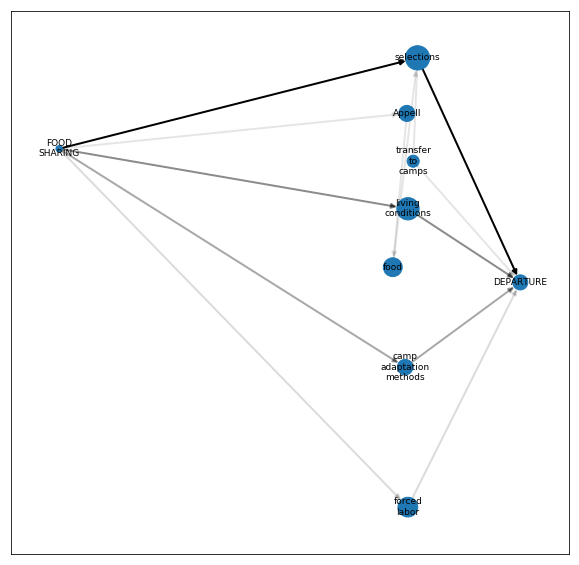

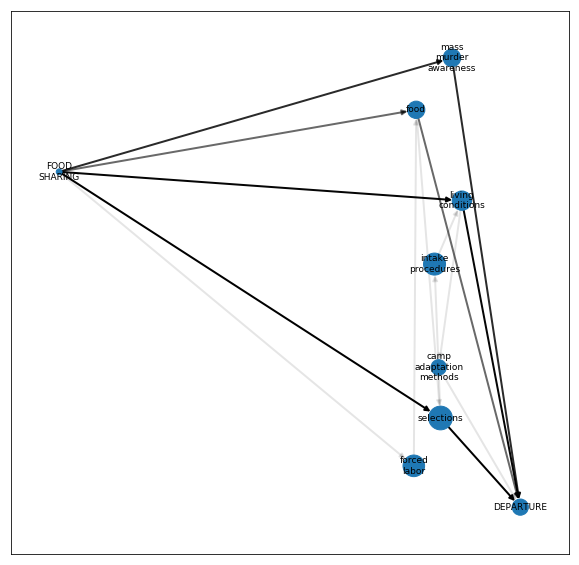

In [183]:
flux = 0.19
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 5

### Qualitative description

In narratives of women, the discussion of friendship tends to be preceded by the discussion of living environments and housing conditions. By contrast, men tend to discuss it in the context of forced labor.


## Visualization

In [208]:
story_start = 'arrival'
story_end = 'friends'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-living conditions-friends
6.591571087747801
arrival-selections-friends
5.346033588653356
arrival-intake procedures-friends
4.997179746503227
arrival-intake procedures-living conditions-forced labor-friends
4.590098569288088
arrival-loved ones' separations-intake procedures-housing conditions-Appell-food-friends
3.7031378393399015
arrival-selections-camp adaptation methods-friends
3.5523115318884244
arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-friends
2.816828785320058
arrival-intake procedures-living conditions-selections-Mengele, Josef-friends
2.642473813467211
arrival-loved ones' separations-intake procedures-mass murder awareness-friends
2.5277662752212975
arrival-selections-intake procedures-Appell-friends
2.161200306069866
arrival-intake procedures-prisoner tattoos (stills)-friends
2.1529641573491927
arrival-selections-intake procedures-housing conditions-social relations-friends
2.

Path flux		%path	%of total	path
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-friends
4.6700075871564675
arrival-selections-intake procedures-living conditions-friends
4.65631175902422
arrival-selections-friends
4.2474634135366065
arrival-intake procedures-prisoner tattoos (stills)-mass murder awareness-friends
3.9316874149390997
arrival-selections-intake procedures-living conditions-camp adaptation methods-friends
3.216155454739143
arrival-selections-intake procedures-friends
3.121548792940986
arrival-intake procedures-food-friends
2.8029366213693416
arrival-selections-intake procedures-housing conditions-Appell-family interactions-friends
2.8017270647430075
arrival-intake procedures-forced labor-politico-military event awareness-friends
2.7992099788865463
arrival-loved ones' separations-intake procedures-living conditions-food-selections-twins in the camps-friends
2.592301765774826
arrival-selections-departure-transfer conditions-transfer corpses-Holocau

Calculate for women

In [209]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-intake procedures-living conditions-forced labor-friends
4.590098569288088


4.590098569288088


Calculate for men

In [210]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-friends
4.6700075871564675


4.6700075871564675


In [213]:
result = []

for path in flux_w:
    if len(path.split('living conditions-friends'))>1 or len(path.split('housing conditions-friends'))>1 or len(path.split('camp barracks-friends'))>1 :
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-friends
6.591571087747801


arrival-Mengele, Josef-intake procedures-housing conditions-friends
1.6297780786235636


arrival-family interactions-loved ones' fates-intake procedures-camp barracks-friends
0.5950415997564671


arrival-injuries (stills)-post-conflict medical problems-food-selections-intake procedures-camp barracks-friends
0.015434083910216235


arrival-adaptation methods-forced labor-food-selections-intake procedures-camp barracks-friends
0.0005584160404012229


arrival-clothing-housing conditions-Appell-selections-intake procedures-camp barracks-friends
0.00014533770358999976


8.83252860378204


Calculate for men

In [214]:
result = []

for path in flux_m:
    if len(path.split('living conditions-friends'))>1 or len(path.split('housing conditions-friends'))>1 or len(path.split('camp barracks-friends'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-friends
4.65631175902422


arrival-selections-intake procedures-housing conditions-friends
2.4488678540066577


arrival-non-Jewish kapos-Jewish kapos-departure-freight trains-intake procedures-camp barracks-friends
0.07215246803722167


arrival-personnel-forced labor-food-camp adaptation methods-intake procedures-camp barracks-friends
0.007113622763331744


arrival-Soviet soldiers-Jewish soldiers-post-conflict return journeys-shelter provision-temporary identity concealment-farms-working life-future message-loved ones' introductions-Jewish prayers-selections-intake procedures-camp barracks-friends
0.004436835677341907


arrival-Yiddish (language)-prisoner tattoos-prisoner tattoos (stills)-living conditions-Appell-selections-intake procedures-camp barracks-friends
0.0017740970185777464


7.19065663652735


5 labels to show
8 labels to show


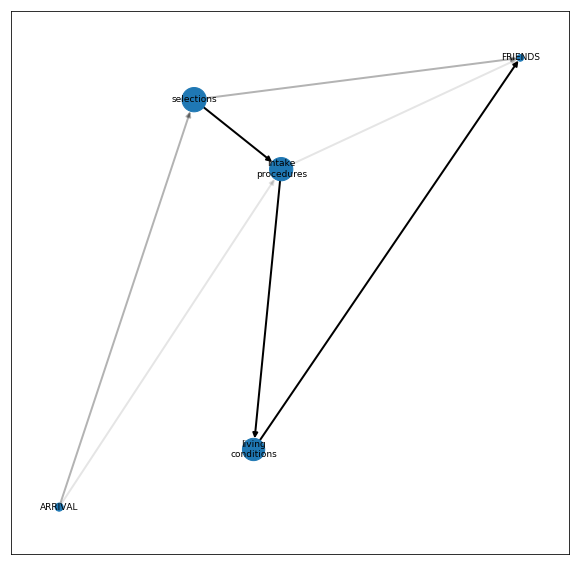

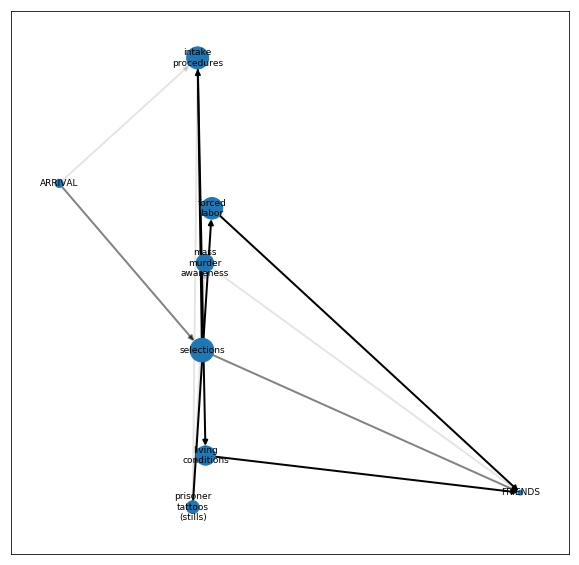

In [207]:
flux = 0.16
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 6

### Qualitative description

In narratives of women, the most immediate topic that follows the discussion of friendship is living conditions; by contrast, in narratives of men, this is forced labour.


## Visualization

In [48]:
story_start = 'friends'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
friends-selections-departure
5.955928507872722
friends-food-selections-intake procedures-living conditions-departure
3.558783321055108
friends-camp adaptation methods-departure
3.5153708375958646
friends-departure
2.8678412611674506
friends-forced labor-departure
2.782018710473601
friends-living conditions-selections-transfer to camps-departure
2.53109801932469
friends-Appell-selections-transfer procedures-departure
2.3794166654253375
friends-prisoner tattoos (stills)-living conditions-selections-intake procedures-mass murder awareness-departure
2.1747949186461724
friends-housing conditions-Appell-food-selections-intake procedures-living conditions-transfer procedures-departure
2.154678640599962
friends-social relations-departure
1.9864867065654603
friends-intake procedures-housing conditions-food-departure
1.9112491106106593
friends-aid giving-departure
1.5393625662936363
friends-Mengele, Josef-intake procedures-family interactions-departure
1.362764570

Path flux		%path	%of total	path
friends-selections-departure
4.637642045794219
friends-mass murder awareness-departure
3.368196899519061
friends-loved ones' fates-intake procedures-living conditions-departure
3.1548303339140538
friends-intake procedures-food-departure
2.5220721911462056
friends-forced labor-food-selections-intake procedures-living conditions-camp adaptation methods-departure
2.3717404140116094
friends-departure
2.2462206479264704
friends-camp procedures-forced labor-departure
2.0414019017181224
friends-living conditions-selections-intake procedures-housing conditions-Appell-departure
1.9836312566283467
friends-social relations-selections-loved ones' fates-departure
1.8970795078772835
friends-camp adaptation methods-departure
1.8089195538240308
friends-loved ones' fates-forced labor-politico-military event awareness-departure
1.6937419684948358
friends-transfer to camps-departure
1.5508266764394931
friends-selections-intake procedures-living conditions-food-camp adaptat

Calculate for women

In [49]:
result = []

for path in flux_w:
    if len(path.split('friends-forced labor-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

6.671775202467491


Calculate for men

In [50]:
result = []

for path in flux_m:
    if len(path.split('friends-forced labor-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

2.5219001012159747


In [51]:
result = []

for path in flux_w:
    if len(path.split('friends-living conditions-'))>1 or len(path.split('friends-housing conditions-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

5.773562656241896


Calculate for men

In [52]:
result = []

for path in flux_m:
    if len(path.split('friends-living conditions-'))>1 or len(path.split('friends-housing conditions-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

3.4853960875391343


7 labels to show
10 labels to show


(<networkx.classes.digraph.DiGraph at 0x10609fb70>,
 {'friends': array([-1.        , -0.30741147]),
  'selections': array([0.11013709, 0.53474545]),
  'departure': array([ 0.29241391, -0.38918987]),
  'mass murder awareness': array([0.09368758, 0.05273173]),
  "loved ones' fates": array([ 0.08616308, -0.63128764]),
  'intake procedures': array([ 0.0518764 , -0.36221587]),
  'living conditions': array([0.09365437, 0.69195619]),
  'food': array([0.09858892, 0.21516715]),
  'forced labor': array([0.08611832, 0.37810921]),
  'camp adaptation methods': array([ 0.08736032, -0.18260489])},
 {0: '1910s photographs (stills)',
  1: '1920s photographs (stills)',
  2: '1930s photographs (stills)',
  3: '1940s documents and artifacts (stills)',
  4: '1940s photographs (stills)',
  5: '1970s documents and artifacts (stills)',
  6: '1980s photographs (stills)',
  7: '1990s photographs (stills)',
  8: 'Allied armed forces',
  9: 'Allied military operations',
  10: 'Appell',
  11: 'Austrian kapos',
  1

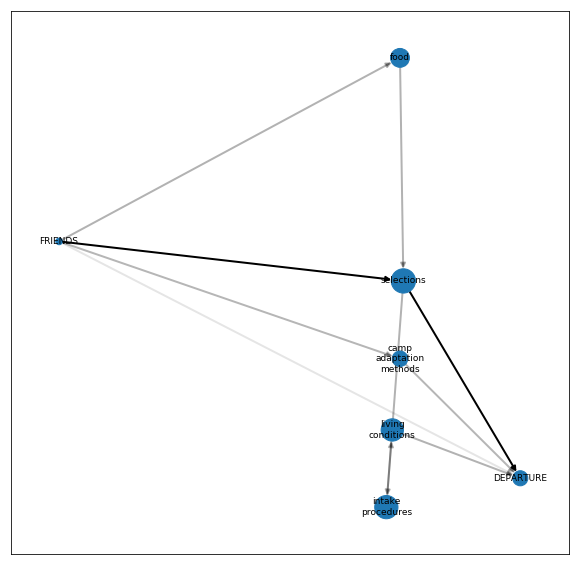

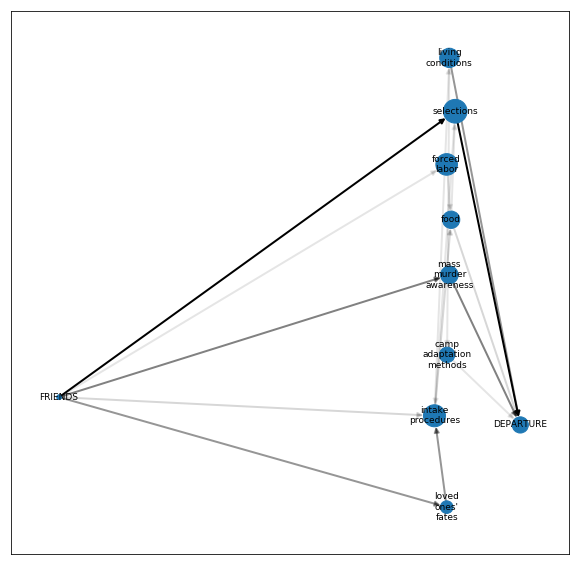

In [53]:
flux = 0.15
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we can see that a significant amount of traffic is going through aid giving  and social bonds. Their significance can be understood if they are compared to Appel. The amount of traffic going through friendship  and food sharing is less significant. 

In case of women, more traffic is going through these nodes, with an exception of aid giving:
	•	social bonds: 3.41 %
	•	aid giving: 2.59 %
	•	friendship: 0.67
	•	food sharing: 0.57 %
In case of men, less traffic is going through these nodes:
	•	social bonds: 2.9 %
	•	aid giving: 2.9 %
	•	friendship: 0.32
	•	food sharing: 0.32 %

#### Total traffic going through them in the complete dataset (men and women):

In [54]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
7.006485320496325
arrival-intake procedures-living conditions-departure
4.846820896097258
arrival-selections-intake procedures-mass murder awareness-departure
2.7240125401032094
arrival-selections-intake procedures-living conditions-forced labor-departure
2.5996895184209734
arrival-intake procedures-housing conditions-Appell-food-departure
2.550858024621911
arrival-selections-transfer to camps-departure
2.4209002034835465
arrival-selections-camp adaptation methods-departure
2.2738833291695157
arrival-selections-transfer procedures-departure
2.164894351602214
arrival-selections-loved ones' fates-departure
1.7244913283563486
arrival-intake procedures-Appell-departure
1.7095683633583099
arrival-loved ones' separations-intake procedures-living conditions-transfer procedures-departure
1.6763898291479178
arrival-intake procedures-living conditions-camp adaptation methods-departure
1.3870337080444417
arrival-loved ones' separations-

Calculate the total traffic going through social bonds

In [55]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [56]:
for i,element in enumerate(flux_complete):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

2.9361759723023995


Calculate the total traffic going through aid giving

In [57]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

2.6717827843064574


Calculate the total traffic going through Appell

In [58]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

12.190907134349045


Calculate the total traffic going through escape

In [59]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.03714920335464339


Calculate the total traffic going through friendship

In [60]:
for i,element in enumerate(flux_complete):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete[element])
print(np.array(total_friends).sum())

0.5376218614701348


Calculate the total traffic going through food sharing

In [61]:
for i,element in enumerate(flux_complete):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete[element])
print(np.array(total_food_sharing).sum())

0.3785032595815108


#### Total traffic going through them in the dataset of women

In [62]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
7.517200999471624
arrival-intake procedures-living conditions-departure
4.858038065703759
arrival-intake procedures-living conditions-forced labor-departure
2.749742512225775
arrival-selections-transfer procedures-departure
2.6039435889197016
arrival-selections-transfer to camps-departure
2.5456843106327636
arrival-selections-camp adaptation methods-departure
2.4313960757206736
arrival-intake procedures-mass murder awareness-departure
2.2874165231578174
arrival-loved ones' separations-intake procedures-living conditions-transfer procedures-departure
2.1203030242807595
arrival-intake procedures-Appell-food-departure
1.9280550915977268
arrival-aid giving-departure
1.5051036405982332
arrival-loved ones' separations-intake procedures-family interactions-departure
1.4407891815116984
arrival-extended family members-departure
1.418156822738129
arrival-intake procedures-housing conditions-Appell-departure
1.3891395538715132
arrival-M

In [63]:
len(flux_w)

591

In [64]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [65]:
for i,element in enumerate(flux_w):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

3.474288919133106


Calculate the total traffic going through aid giving

In [66]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

2.4642121645175594


Calculate the total traffic going through friendship

In [67]:
for i,element in enumerate(flux_w):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w[element])
print(np.array(total_friends).sum())

0.858955786462983


Calculate the total traffic going through food sharing

In [68]:
for i,element in enumerate(flux_w):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w[element])
        #print (element)
        #print (flux_w[element])
print(np.array(total_food_sharing).sum())

0.35292251677209735


#### Total traffic going through them in the dataset of men

In [69]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
5.316158044987187
arrival-selections-intake procedures-living conditions-departure
4.62752282695804
arrival-selections-intake procedures-food-departure
3.5163304225769694
arrival-mass murder awareness-departure
3.1987488206226544
arrival-intake procedures-prisoner tattoos (stills)-forced labor-departure
2.375006795406318
arrival-selections-intake procedures-living conditions-camp adaptation methods-departure
2.2599867508906004
arrival-selections-intake procedures-housing conditions-Appell-departure
2.1937653441767564
arrival-selections-camp adaptation methods-departure
2.078152699703643
arrival-selections-loved ones' fates-departure
1.8605985090762536
arrival-intake procedures-forced labor-politico-military event awareness-departure
1.5925257252239313
arrival-intake procedures-living conditions-food-camp adaptation methods-departure
1.522839723233611
arrival-selections-transfer to camps-departure
1.4843069438860215
arrival-in

In [70]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [71]:
for i,element in enumerate(flux_m):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

2.4630332857629655


Calculate the total traffic going through aid giving

In [72]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

2.582800743516971


Calculate the total traffic going through friendship

In [73]:
for i,element in enumerate(flux_m):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m[element])
print(np.array(total_friends).sum())

0.2462599967198602


Calculate the total traffic going through food sharing

In [74]:
total_food_sharing = []

In [75]:
for i,element in enumerate(flux_m):
    if 'food sharing' in element.split('-'):
        #print (element)
        #print (flux_m[element])
        total_food_sharing.append(flux_m[element])
print(np.array(total_food_sharing).sum())

0.2926940919542161


## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds  as states preceding survival explanations; in testimonies of men such paths have significantly less traffic. We can see a similar pattern with friends.

In [76]:
story_start = 'arrival'
story_end = 'survival explanations'

In [77]:
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-survival explanations
5.651026443252306
arrival-intake procedures-living conditions-survival explanations
4.15096051691226
arrival-selections-intake procedures-living conditions-forced labor-survival explanations
3.555518701322224
arrival-intake procedures-mass murder awareness-survival explanations
3.1790893958825808
arrival-selections-camp adaptation methods-survival explanations
3.117198748966701
arrival-intake procedures-family interactions-survival explanations
2.7206210017797505
arrival-loved ones' separations-intake procedures-housing conditions-Appell-survival explanations
2.7086320963092487
arrival-selections-intake procedures-living conditions-diseases-survival explanations
2.3150440852749945
arrival-intake procedures-housing conditions-social relations-survival explanations
2.2547144300318784
arrival-loved ones' separations-intake procedures-living conditions-selections-departure-survival explanations
2.086868221090126
arriv

Path flux		%path	%of total	path
arrival-selections-survival explanations
5.158296738284702
arrival-selections-loved ones' fates-survival explanations
4.2851539171166815
arrival-selections-departure-survival explanations
3.748948812605184
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-survival explanations
3.535691025561157
arrival-intake procedures-living conditions-survival explanations
3.0893366403031837
arrival-intake procedures-living conditions-departure-transfer conditions-survival explanations
2.6382301287632135
arrival-selections-transfer to camps-survival explanations
2.434099779301433
arrival-intake procedures-food-hunger-survival explanations
2.2143233667990474
arrival-selections-intake procedures-living conditions-camp adaptation methods-aid giving-survival explanations
1.9747229803809814
arrival-selections-intake procedures-prisoner tattoos (stills)-mass murder awareness-psychological reactions-survival explanations
1.8761420763229077
arrival-l

Find social bonds in women narratives

In [78]:
result = []
for path in flux_w:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-housing conditions-social relations-survival explanations
2.2547144300318784


arrival-intake procedures-living conditions-friends-survival explanations
0.9322997760921696


arrival-shoes-housing conditions-Appell-selections-intake procedures-living conditions-social relations-survival explanations
0.15472006819428497


arrival-emotions-psychological distress prevention-living conditions-social relations-survival explanations
0.03994543491265819


arrival-property seizure-prisoner tattoos (stills)-living conditions-selections-intake procedures-Appell-food-social relations-survival explanations
0.005337564867344182


arrival-SS/SD personnel-intake procedures-social relations-survival explanations
0.0003647416136984268


arrival-food acquisition-selections-intake procedures-social relations-survival explanations
8.969452305760493e-05


3.3874717102350917


Find aid giving in women narratives

In [79]:
result = []
for path in flux_w:
    if len(path.split('-aid giving-survival explanations'))>1 or len(path.split('-food sharing-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-survival explanations
2.032956399535339


arrival-SS/SD personnel-intake procedures-housing conditions-food-food sharing-survival explanations
0.26689562683447404


2.299852026369813


Find social bonds in men narratives

In [80]:
result = []
for path in flux_m:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-loved ones' fates-intake procedures-food-selections-medical experiments-post-conflict medical problems-friends-survival explanations
0.6215828651848473


arrival-camp adaptation methods-departure-freight trains-selections-intake procedures-housing conditions-Appell-social relations-survival explanations
0.31219525142050947


arrival-interviewee memory-intake procedures-prisoner tattoos-forced labor-beatings-social relations-survival explanations
0.0938158448215383


1.027593961426895


Find aid giving in men narratives

In [81]:
result = []
for path in flux_m:
    if len(path.split('-aid giving-survival explanations'))>1 or len(path.split('-food sharing-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-camp adaptation methods-aid giving-survival explanations
1.9747229803809814


arrival-kapos-selections-intake procedures-prisoner tattoos-forced labor-aid giving-survival explanations
0.6391633927462611


arrival-deportation conditions-selections-intake procedures-camp procedures-forced labor-food sharing-survival explanations
0.24164002070124574


arrival-Jewish kapos-departure-freight trains-selections-intake procedures-camp barracks-Appell-forced labor-food sharing-survival explanations
0.10431919658998183


arrival-Soviet armed forces-liberation-related aid giving-post-conflict medical problems-mass murder awareness-departure-freight trains-transfer conditions-intake procedures-housing conditions-social relations-aid giving-survival explanations
0.003175935867285176


2.9630215262857553


## Visualize


Notice that social bonds are "missing" from the plot showing men

14 labels to show
15 labels to show


(<networkx.classes.digraph.DiGraph at 0x111e380b8>,
 {'arrival': array([-0.82159244,  0.05490623]),
  'selections': array([-0.21537318,  0.3394418 ]),
  'survival explanations': array([0.79829938, 0.51101549]),
  "loved ones' fates": array([0.2205592 , 0.12644346]),
  'departure': array([-0.15550486,  0.01571283]),
  'intake procedures': array([-0.15168858,  0.78117813]),
  'prisoner tattoos (stills)': array([0.05724456, 0.39297438]),
  'forced labor': array([ 0.02910259, -0.01887779]),
  'living conditions': array([-0.05915603, -0.69235109]),
  'transfer conditions': array([-0.12896807, -1.        ]),
  'transfer to camps': array([ 0.00122528, -0.54676564]),
  'food': array([-0.03101995,  0.58513349]),
  'hunger': array([ 0.22763549, -0.90422824]),
  'camp adaptation methods': array([-0.02959309, -0.29786863]),
  'aid giving': array([0.25882969, 0.65328559])},
 {0: '1910s photographs (stills)',
  1: '1920s photographs (stills)',
  2: '1930s photographs (stills)',
  3: '1940s documents

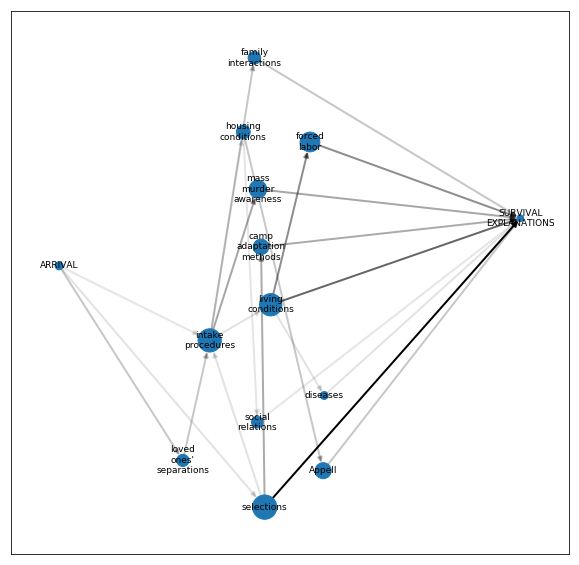

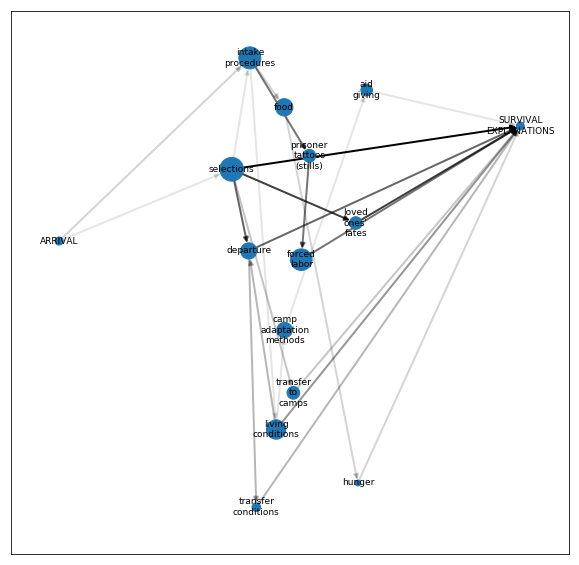

In [82]:
flux = 0.29
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social relations-survival explanations
- selections-friends-survival explanations
- selections-aid giving-survival explanations

These narrative pathways are more significant in testimonies of women than men.


### Visualization

In [83]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
selections-survival explanations
5.995184312276154
selections-intake procedures-living conditions-survival explanations
4.143857046877247
selections-mass murder awareness-survival explanations
3.173479388072827
selections-camp adaptation methods-survival explanations
3.128705235997654
selections-intake procedures-housing conditions-Appell-survival explanations
2.7010425799106135
selections-forced labor-survival explanations
2.4896536090004644
selections-departure-survival explanations
2.0950944274709076
selections-Mengele, Josef-survival explanations
2.0696456754813872
selections-transfer to camps-survival explanations
1.8855884250056718
selections-family interactions-survival explanations
1.6772151795477122
selections-aid giving-survival explanations
1.372566897382252
selections-intake procedures-Appell-food-survival explanations
1.2750570775887082
selections-transfer procedures-departure-transfer conditions-survival explanations
1.0947698761400633
sele

Path flux		%path	%of total	path
selections-survival explanations
5.573167275281716
selections-intake procedures-living conditions-survival explanations
3.086478573024149
selections-loved ones' fates-survival explanations
3.0820476962530226
selections-forced labor-survival explanations
2.8992043876019356
selections-camp adaptation methods-departure-survival explanations
2.7421626249697253
selections-departure-transfer conditions-survival explanations
2.526322047079005
selections-living conditions-departure-transfer to camps-survival explanations
1.9272218380904393
selections-extended family members-survival explanations
1.5864538159305857
selections-intake procedures-food-survival explanations
1.5333992527924132
selections-intake procedures-prisoner tattoos (stills)-survival explanations
1.4183532062719062
selections-Mengele, Josef-survival explanations
1.2831720816827197
selections-intake procedures-prisoner tattoos-survival explanations
1.1050606297533445
selections-intake procedures-

18 labels to show
22 labels to show


(<networkx.classes.digraph.DiGraph at 0x1122a0f28>,
 {'selections': array([0.09857526, 0.21757073]),
  'survival explanations': array([ 1.        , -0.10062942]),
  'intake procedures': array([-0.46467783,  0.00298531]),
  'living conditions': array([-0.12180503, -0.53332396]),
  "loved ones' fates": array([0.53769089, 0.31766489]),
  'forced labor': array([-0.02540608, -0.22703721]),
  'camp adaptation methods': array([-0.43213399,  0.24049744]),
  'departure': array([ 0.08443983, -0.43354772]),
  'transfer conditions': array([ 0.37740272, -0.18383219]),
  'transfer to camps': array([ 0.03234337, -0.81412284]),
  'extended family members': array([0.03286661, 0.98161085]),
  'food': array([-0.22968388, -0.77966107]),
  'prisoner tattoos (stills)': array([-0.38436792, -0.20507075]),
  'Mengele, Josef': array([-0.1152156 ,  0.15567688]),
  'prisoner tattoos': array([-0.30921789, -0.41528728]),
  'camp barracks': array([0.15556637, 0.05906202]),
  'SS/SD personnel': array([-0.12584078,  0

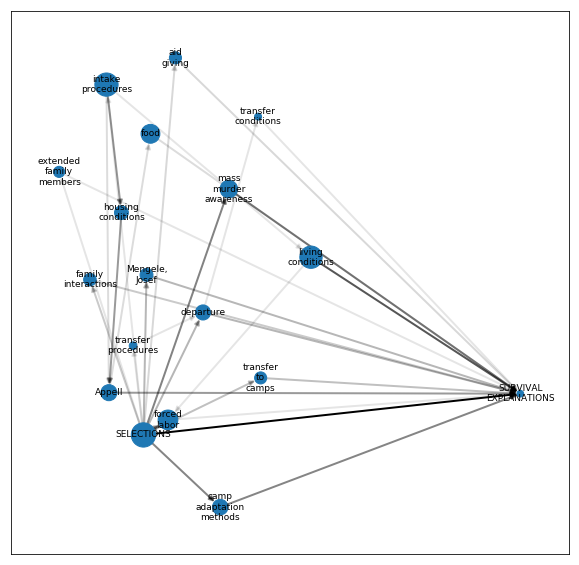

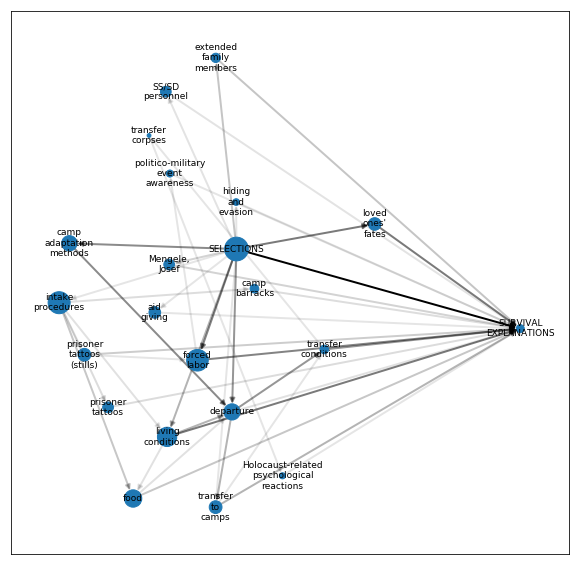

In [84]:
flux = 0.35
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

Find social bonds as transitionary topic between selection and survival explanation in narratives of women

In [85]:
total = []
for path in flux_w:
    if (len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1):
        if len(path.split('-'))==3:
            print (path)
            print (flux_w[path])
            total.append(flux_w[path])
            print ('\n')
print (np.array(total).sum())

selections-social relations-survival explanations
0.8517907825853956


selections-friends-survival explanations
0.4084233290441179


1.2602141116295136


Find social bonds as transitionary topic between selection and survival explanation in narratives of men

In [86]:
total = []
for path in flux_m:
    if (len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1):
        if len(path.split('-'))==3:
            print (path)
            print (flux_m[path])
            total.append(flux_m[path])
            print ('\n')
print (np.array(total).sum())

selections-friends-survival explanations
0.22597524390714183


0.22597524390714183


Find aid giving as transitionary topic between selection and survival explanation in narratives of women

In [87]:
total = []
for path in flux_w:
    if (len(path.split('-aid giving-survival explanations')))>1:
        if len(path.split('-'))==3:
            print (path)
            print (flux_w[path])
            total.append(flux_w[path])
            print ('\n')
print (np.array(total).sum())

selections-aid giving-survival explanations
1.372566897382252


1.372566897382252


Find aid giving as transitionary topic between selection and survival explanation in narratives of men

In [88]:
total = []
for path in flux_m:
    if (len(path.split('-aid giving-survival explanations')))>1:
        if len(path.split('-'))==3:
            print (path)
            print (flux_m[path])
            total.append(flux_m[path])
            print ('\n')
print (np.array(total).sum())

selections-aid giving-survival explanations
0.9130792244020753


0.9130792244020753


## Interpretation

The main context of solidarity for women was the barack, i.e. the everyday living environment. By contrast, for men solidarity was rather connected with forced labour and the working environment. Therefore, women and men remember about acts of solidarity in different contexts, which also suggests that they took place in different contexts in the past.

We can see a similar pattern with social activity. Women discuss it in the context of the living environment, whereas man discuss it in the context of work environment.

Generally, speaking if we look at the amount of traffic going through social activity and solidarity, we can see that in case of  women more traffic is going towards solidarity and social activity. 

What also illustrates the different role of solidarity and sociability for men and women is that women are likely to attribute their survival to them